total_primary_signal_missing_count 15685083 20 % of things make up 34 %
total_cycle_second_missing_count 4466944 20 % of things make up 76 %
total_skipped_cycles_count 19315712
total_cycles_count 424284274
total_removed_cycles_count 13755057 20 % of things make up 95 %
total_invalid_cycle_length_count 8399133 20 % of things make up 94 %
total_invalid_transition_in_cycle_count 6027201 20 % of things make up 99 %
total_missing_observation_in_cycle_count 7049388 20 % of things make up 99 %
total_median_metric_of_all_things 2.0
bus_count 3
detector_count 4


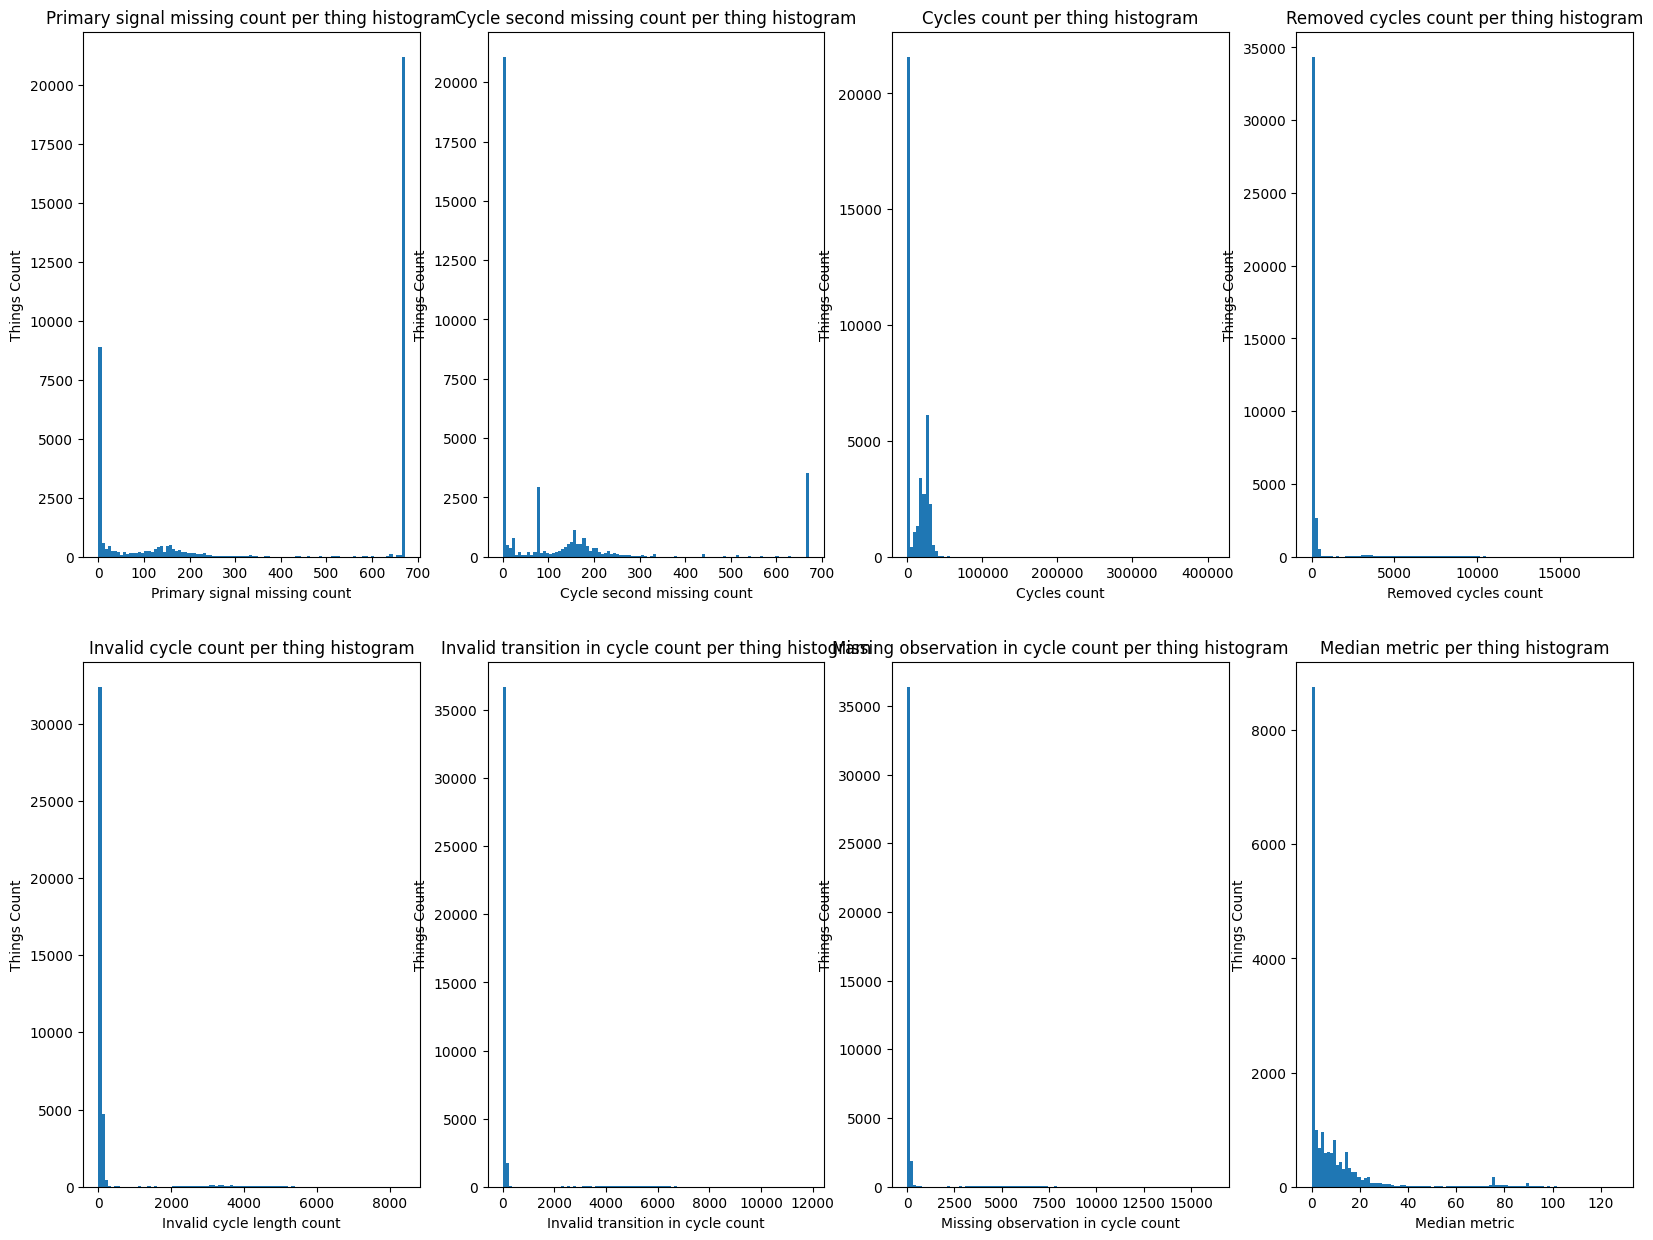

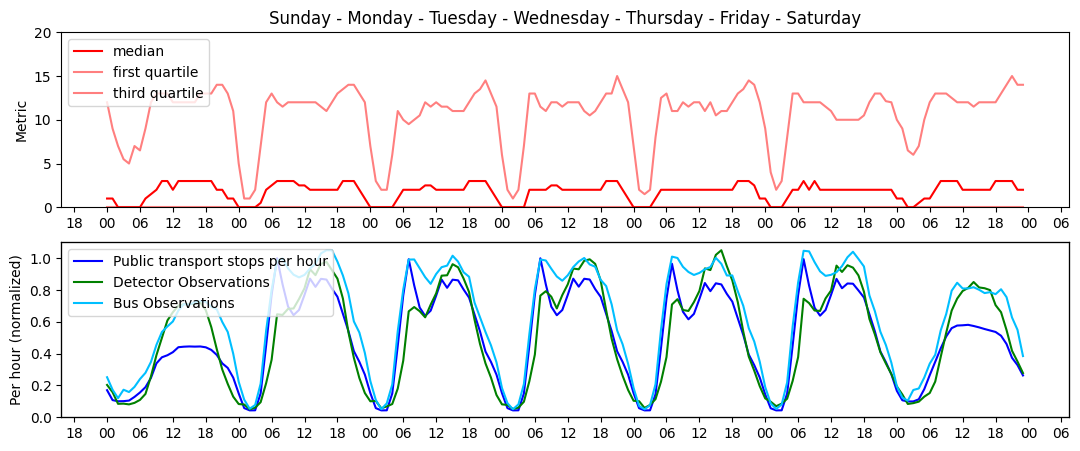

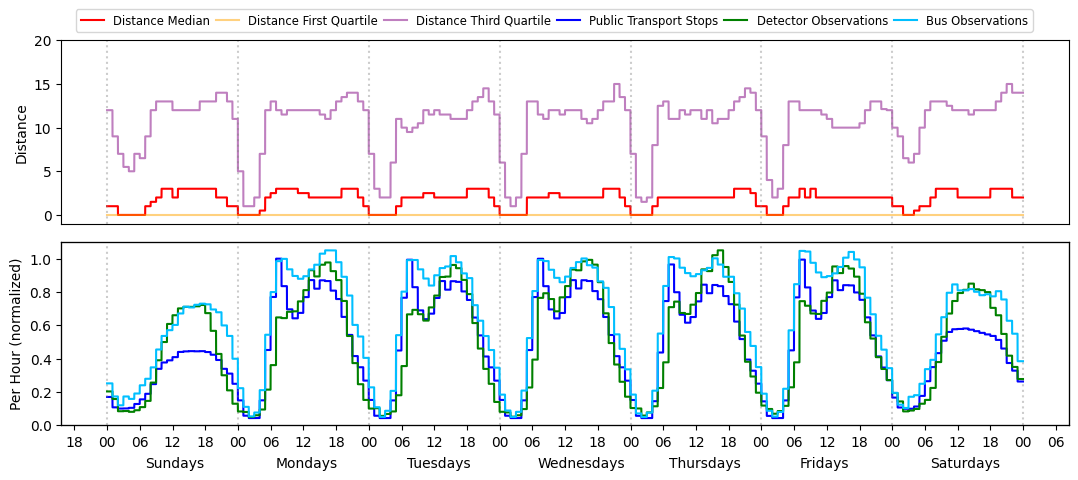

In [3]:
# Read processed_things.json

import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime
from os import listdir
from os.path import isfile, join
import collections
import matplotlib.gridspec as gridspec

with open('processed_things_2023_11_15.json') as f:
    processed_things = json.load(f)

# Stats
total_primary_signal_missing_count = 0
total_cycle_second_missing_count = 0
total_skipped_cycles_count = 0
total_cycles_count = 0
total_removed_cycles_count = 0
total_invalid_cycle_length_count = 0
total_invalid_transition_in_cycle_count = 0
total_missing_observation_in_cycle_count = 0
cycles_counts_per_thing = []
primary_signal_missing_counts_per_thing = []
cycle_second_missing_counts_per_thing = []
removed_cycles_counts_per_thing = []
invalid_cycle_length_count_per_thing = []
invalid_transition_in_cycle_count_per_thing = []
missing_observation_in_cycle_count_per_thing = []
median_metrics_per_thing = []

# Cells for week days and hours metric study
cells = [
    [
        [] for i in range(24)
    ] for j in range(7)
]
    
for thing_name, thing in processed_things.items():
    total_primary_signal_missing_count += thing['PrimarySignalMissingCount']
    total_cycle_second_missing_count += thing['CycleSecondMissingCount']
    total_skipped_cycles_count += thing['TotalSkippedCycles']
    total_cycles_count += thing['TotalCyclesCount']
    total_removed_cycles_count += thing['TotalRemovedCycleCount']
    total_invalid_cycle_length_count += thing['TotalInvalidCycleLengthCount']
    total_invalid_transition_in_cycle_count += thing['TotalInvalidCycleTransitionCount']
    total_missing_observation_in_cycle_count += thing['TotalInvalidCycleMissingCount']
    
    primary_signal_missing_counts_per_thing.append(thing['PrimarySignalMissingCount'])
    cycle_second_missing_counts_per_thing.append(thing['CycleSecondMissingCount'])
    cycles_counts_per_thing.append(thing['TotalCyclesCount'])
    removed_cycles_counts_per_thing.append(thing['TotalRemovedCycleCount'])
    invalid_cycle_length_count_per_thing.append(thing['TotalInvalidCycleLengthCount'])
    invalid_transition_in_cycle_count_per_thing.append(thing['TotalInvalidCycleTransitionCount'])
    missing_observation_in_cycle_count_per_thing.append(thing['TotalInvalidCycleMissingCount'])
    
    total_metrics_of_thing = []
    metrics = thing["Metrics"]
    for day_idx in range(7):
        for hour_idx in range(24):
            cells[day_idx][hour_idx].append(metrics[day_idx][hour_idx])
            if metrics[day_idx][hour_idx] != -1.0:
                total_metrics_of_thing.append(metrics[day_idx][hour_idx])
    if len(total_metrics_of_thing) > 0:
        median_metrics_per_thing.append(np.median(np.array(total_metrics_of_thing)))
    
primary_signal_missing_counts_per_thing.sort(reverse=True)
cycle_second_missing_counts_per_thing.sort(reverse=True)
removed_cycles_counts_per_thing.sort(reverse=True)
invalid_cycle_length_count_per_thing.sort(reverse=True)
invalid_transition_in_cycle_count_per_thing.sort(reverse=True)
missing_observation_in_cycle_count_per_thing.sort(reverse=True)

PORTION = 0.2

primary_signal_missing_counts_per_thing_first_x_percent = primary_signal_missing_counts_per_thing[:int(len(primary_signal_missing_counts_per_thing) * PORTION)]
cycle_second_missing_counts_per_thing_first_x_percent = cycle_second_missing_counts_per_thing[:int(len(cycle_second_missing_counts_per_thing) * PORTION)]
removed_cycles_counts_per_thing_first_x_percent = removed_cycles_counts_per_thing[:int(len(removed_cycles_counts_per_thing) * PORTION)]
invalid_cycle_length_count_per_thing_first_x_percent = invalid_cycle_length_count_per_thing[:int(len(invalid_cycle_length_count_per_thing) * PORTION)]
invalid_transition_in_cycle_count_per_thing_first_x_percent = invalid_transition_in_cycle_count_per_thing[:int(len(invalid_transition_in_cycle_count_per_thing) * PORTION)]
missing_observation_in_cycle_count_per_thing_first_x_percent = missing_observation_in_cycle_count_per_thing[:int(len(missing_observation_in_cycle_count_per_thing) * PORTION)]

primary_signal_missing_counts_per_thing_first_x_percent_sum = sum(primary_signal_missing_counts_per_thing_first_x_percent)
cycle_second_missing_counts_per_thing_first_x_percent_sum = sum(cycle_second_missing_counts_per_thing_first_x_percent)
removed_cycles_counts_per_thing_first_x_percent_sum = sum(removed_cycles_counts_per_thing_first_x_percent)
invalid_cycle_length_count_per_thing_first_x_percent_sum = sum(invalid_cycle_length_count_per_thing_first_x_percent)
invalid_transition_in_cycle_count_per_thing_first_x_percent_sum = sum(invalid_transition_in_cycle_count_per_thing_first_x_percent)
missing_observation_in_cycle_count_per_thing_first_x_percent_sum = sum(missing_observation_in_cycle_count_per_thing_first_x_percent)

    
print('total_primary_signal_missing_count', total_primary_signal_missing_count, int(PORTION*100), '% of things make up', int((primary_signal_missing_counts_per_thing_first_x_percent_sum / total_primary_signal_missing_count)*100), '%')
print('total_cycle_second_missing_count', total_cycle_second_missing_count, int(PORTION*100),'% of things make up', int((cycle_second_missing_counts_per_thing_first_x_percent_sum / total_cycle_second_missing_count)*100), '%')
print('total_skipped_cycles_count', total_skipped_cycles_count)
print('total_cycles_count', total_cycles_count)
print('total_removed_cycles_count', total_removed_cycles_count, int(PORTION*100),'% of things make up', int((removed_cycles_counts_per_thing_first_x_percent_sum / total_removed_cycles_count)*100), '%')
print('total_invalid_cycle_length_count', total_invalid_cycle_length_count, int(PORTION*100),'% of things make up', int((invalid_cycle_length_count_per_thing_first_x_percent_sum / total_invalid_cycle_length_count)*100), '%')
print('total_invalid_transition_in_cycle_count', total_invalid_transition_in_cycle_count, int(PORTION*100),'% of things make up', int((invalid_transition_in_cycle_count_per_thing_first_x_percent_sum / total_invalid_transition_in_cycle_count)*100), '%')
print('total_missing_observation_in_cycle_count', total_missing_observation_in_cycle_count, int(PORTION*100),'% of things make up', int((missing_observation_in_cycle_count_per_thing_first_x_percent_sum / total_missing_observation_in_cycle_count)*100), '%')
print('total_median_metric_of_all_things', np.median(np.array(median_metrics_per_thing)))

histogram_data_to_plot = [
    {
        "data": primary_signal_missing_counts_per_thing,
        "title": "Primary signal missing count per thing histogram",
        "xlabel": "Primary signal missing count",
        "ylabel": "Things Count",
    },
    {
        "data": cycle_second_missing_counts_per_thing,
        "title": "Cycle second missing count per thing histogram",
        "xlabel": "Cycle second missing count",
        "ylabel": "Things Count",
    },
    {
        "data": cycles_counts_per_thing,
        "title": "Cycles count per thing histogram",
        "xlabel": "Cycles count",
        "ylabel": "Things Count",
    },
    {
        "data": removed_cycles_counts_per_thing,
        "title": "Removed cycles count per thing histogram",
        "xlabel": "Removed cycles count",
        "ylabel": "Things Count",
    },
    {
        "data": invalid_cycle_length_count_per_thing,
        "title": "Invalid cycle count per thing histogram",
        "xlabel": "Invalid cycle length count",
        "ylabel": "Things Count",
    },
    {
        "data": invalid_transition_in_cycle_count_per_thing,
        "title": "Invalid transition in cycle count per thing histogram",
        "xlabel": "Invalid transition in cycle count",
        "ylabel": "Things Count",
    },
    {
        "data": missing_observation_in_cycle_count_per_thing,
        "title": "Missing observation in cycle count per thing histogram",
        "xlabel": "Missing observation in cycle count",
        "ylabel": "Things Count",
    },
    {
        "data": median_metrics_per_thing,
        "title": "Median metric per thing histogram",
        "xlabel": "Median metric",
        "ylabel": "Things Count",
    },
]

number_of_charts = len(histogram_data_to_plot)
rows = int(number_of_charts / 4) + (1 if number_of_charts % 4 > 0 else 0)

fig, ax = plt.subplots(rows, 4, figsize=(20, 15))

for j in range(ax.shape[0]):
    for i in range(ax.shape[1]):
        index = i + j * ax.shape[1]
        if index >= number_of_charts:
            continue
        
        single_ax = ax[j][i]
        single_ax.hist(histogram_data_to_plot[index]["data"], bins=100)
        single_ax.set_xlabel(histogram_data_to_plot[index]["xlabel"])
        single_ax.set_ylabel(histogram_data_to_plot[index]["ylabel"])
        single_ax.set_title(histogram_data_to_plot[index]["title"])


cell_stats = [
    [
        {} for i in range(24)
    ] for j in range(7)
]

cell_values = [
    [
        [] for i in range(24)
    ] for j in range(7)
]

for day_idx in range(7):
    for hour_idx in range(24):
        metrics = np.array(cells[day_idx][hour_idx])
        metrics_cleaned = [] # without -1.0 (stands for no cycles in this time)
        for metric in metrics:
            if metric != -1.0:
                metrics_cleaned.append(metric)
        min = np.min(metrics_cleaned)
        max = np.max(metrics_cleaned)
        median = np.median(metrics_cleaned)
        first_quartile = np.percentile(metrics_cleaned, 25)
        third_quartile = np.percentile(metrics_cleaned, 75)
        cell_stats[day_idx][hour_idx] = {
            'min': min,
            'max': max,
            'median': median,
            'first_quartile': first_quartile,
            'third_quartile': third_quartile,
        }
        cell_values[day_idx][hour_idx] += metrics_cleaned
        
def convert_to_local_time(cells):
    local_cells = [
        [
            [] for i in range(24)
        ] for j in range(7)
    ]
    
    for day_idx in range(7):
        for hour_idx in range(24):
            new_hour_idx = hour_idx + 2 # (summer time)
            new_day_idx = day_idx
            if new_hour_idx >= 24:
                new_day_idx = (day_idx + 1) % 7
                new_hour_idx = new_hour_idx % 24
            
            local_cells[new_day_idx][new_hour_idx] = cells[day_idx][hour_idx]
    
    return cells

# Convert to local time
cell_stats = convert_to_local_time(cell_stats)
cell_values = convert_to_local_time(cell_values)
        
hours = []
for i in range(24):
    hours.append(datetime.datetime(day=20, month=10, year=2023, hour=i, minute=0))
    
week_hours = []
for i in range(7):
    for j in range(24):
        week_hours.append(datetime.datetime(day=20+i, month=10, year=2023, hour=j, minute=0))
        
cell_stats_week = []
for i in range(7):
    cell_stats_week += cell_stats[i]
    
days = 7
rows = int(days / 4) + (1 if days % 4 > 0 else 0)

public_transport_stoptimes = [[] for i in range(7)]
public_transport_stoptimes_files = [
    "sunday.json",
    "monday.json",
    "tuesday.json",
    "wednesday.json",
    "thursday.json",
    "friday.json",
    "saturday.json",
]

day_names = [
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
]

for i in range(7):
    with open(f"public_transport_stop_times/{public_transport_stoptimes_files[i]}") as f:
        public_transport_stoptimes[i] = json.load(f)
        
public_transport_stoptimes_hours = [[] for i in range(len(public_transport_stoptimes))]
for i in range(len(public_transport_stoptimes)):
    for stoptime in public_transport_stoptimes[i]:
        public_transport_stoptimes_hours[i].append(int(stoptime.split(":")[0]))
        
public_transport_stoptimes_hours_aggregated = [[0 for i in range(24)] for j in range(7)]
for i in range(len(public_transport_stoptimes_hours)):
    for hour in public_transport_stoptimes_hours[i]:
        public_transport_stoptimes_hours_aggregated[i][hour] += 1
        
# Duplicate each element in list:
"""        
for i in range(len(public_transport_stoptimes_hours_aggregated)):
    public_transport_stoptimes_hours_aggregated[i] = [val for val in public_transport_stoptimes_hours_aggregated[i] for _ in (0, 1)]
     """
public_transport_week_stop_times = []
for i in range(len(public_transport_stoptimes_hours_aggregated)):
    public_transport_week_stop_times += public_transport_stoptimes_hours_aggregated[i]
public_transport_week_stop_times_normalized = []
public_transport_stoptimes_max = np.max(np.array(public_transport_week_stop_times))
for stop_time in public_transport_week_stop_times:
    public_transport_week_stop_times_normalized += [stop_time / public_transport_stoptimes_max]
        
""" days = 7

fig, ax = plt.subplots(1, 7, figsize=(15, 5))

for j in range(ax.shape[0]):
    day_idx = j 
    if day_idx >= days:
        continue
    
    single_ax = ax[j]

    min_values = []
    max_values = []
    median_values = []
    first_quartile_values = []
    third_quartile_values = []
    
    for hour_idx in range(24):
        min_values.append(cell_stats[day_idx][hour_idx]['min'])
        max_values.append(cell_stats[day_idx][hour_idx]['max'])
        median_values.append(cell_stats[day_idx][hour_idx]['median'])
        first_quartile_values.append(cell_stats[day_idx][hour_idx]['first_quartile'])
        third_quartile_values.append(cell_stats[day_idx][hour_idx]['third_quartile'])

    
        min_values.append(cell_stats[day_idx][hour_idx]['min'])
        max_values.append(cell_stats[day_idx][hour_idx]['max'])
        median_values.append(cell_stats[day_idx][hour_idx]['median'])
        first_quartile_values.append(cell_stats[day_idx][hour_idx]['first_quartile'])
        third_quartile_values.append(cell_stats[day_idx][hour_idx]['third_quartile'])
    
    single_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    single_ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
    single_ax.plot(hours, min_values, label="min", color='blue', alpha=0.3)
    single_ax.plot(hours, max_values, label="max", color='blue', alpha=0.3)
    single_ax.plot(hours, median_values, label="median", color='red', alpha=1)
    single_ax.plot(hours, first_quartile_values, label="first quartile", color='green', alpha=0.6)
    single_ax.plot(hours, third_quartile_values, label="third quartile", color='green', alpha=0.6)
    # single_ax.set_xlabel('Time')
    single_ax.set_ylim([0, 20])
    single_ax.set_title(day_names[day_idx])
    # single_ax.legend()
    
    single_ax2 = single_ax.twinx()
    single_ax2.plot(hours, public_transport_stoptimes_hours_aggregated[day_idx], label="Public transport stops per hour", color='pink', alpha=1)
    single_ax2.set_ylim([0, 70000])
    if day_idx != 0 and day_idx != 6:
        single_ax2.tick_params(axis='y', which='both', labelleft=False, labelright=False)
        single_ax.tick_params(axis='y', which='both', labelleft=False, labelright=False)
    if day_idx == 0:
        single_ax2.tick_params(axis='y', which='both', labelleft=False, labelright=False)
        single_ax.set_ylabel('Metric')
        single_ax.yaxis.set_major_locator(mticker.MultipleLocator(1))
    if day_idx == 6:
        single_ax.tick_params(axis='y', which='both', labelleft=False, labelright=False)
        single_ax2.set_ylabel('Public transport stops per hour')
    # single_ax2.legend() """
        
# VIOLIN PLOTS
""" days = 7
rows = int(days / 2) + (1 if days % 2 > 0 else 0)

fig, ax = plt.subplots(7, 1, figsize=(20, 100))

for j in range(ax.shape[0]):
    day_idx = j
    if day_idx >= days:
        continue
    
    single_ax = ax[j]

    single_ax.violinplot(cell_values[day_idx], showmeans=True, showmedians=True, showextrema=True, widths=0.9)
    single_ax.set_xlabel('Time')
    single_ax.set_ylabel('Metric')
    single_ax.set_ylim([0, 40])
    single_ax.set_title(f"Day idx {str(day_idx)}")
    single_ax.legend()
 """
 
def get_observation_per_hour_cells(observations_per_hour_counts):
    observations_per_hour_timestamp_counts_ordered = collections.OrderedDict(sorted(observations_per_hour_counts.items(), reverse=True))

    observations_per_hour_timestamp_counts_aggregated = [
        [
            [] for j in range(24)    
        ] for i in range(7)
    ]

    day_idx = 4
    hour_idx = 23
    day_count = 0

    factor = 7*24*3600
        
    for timestamp, count in observations_per_hour_timestamp_counts_ordered.items():
        # End time (took von times.go code)
        """ location, err := time.LoadLocation("Europe/Berlin")
        if err != nil {
            panic(err)
        }
        endDate := time.Date(2023, 10, 20, 0, 0, 0, 0, location) """
        int_timestamp = int(timestamp.replace(".0", ""))
        if int_timestamp >= 1697752800:
            continue
        
        last_count = count
        third_count = observations_per_hour_timestamp_counts_ordered[str(int_timestamp - (1 * factor)) + ".0"]
        second_count = observations_per_hour_timestamp_counts_ordered[str(int_timestamp - (2 * factor)) + ".0"]
        first_count = observations_per_hour_timestamp_counts_ordered[str(int_timestamp - (3 * factor)) + ".0"]
        
        observations_per_hour_timestamp_counts_aggregated[day_idx][hour_idx] = [first_count, second_count, third_count, last_count]
        
        first_datetime = datetime.datetime.fromtimestamp(int_timestamp - (3 * factor))
        second_datetime = datetime.datetime.fromtimestamp(int_timestamp - (2 * factor))
        third_datetime = datetime.datetime.fromtimestamp(int_timestamp - (1 * factor))
        last_datetime = datetime.datetime.fromtimestamp(int_timestamp)
        
        if first_datetime.weekday() != second_datetime.weekday() or first_datetime.weekday() != third_datetime.weekday() or first_datetime.weekday() != last_datetime.weekday():
            raise Exception("Days do not match")
        if first_datetime.hour != second_datetime.hour or first_datetime.hour != third_datetime.hour or first_datetime.hour != last_datetime.hour:
            raise Exception("Hours do not match")
        if first_datetime.minute != 0 or second_datetime.minute != 0 or third_datetime.minute != 0 or last_datetime.minute != 0:
            raise Exception("Minutes do not match")
        if first_datetime.second != 0 or second_datetime.second != 0 or third_datetime.second != 0 or last_datetime.second != 0:
            raise Exception("Seconds do not match")
        
        if first_datetime.hour != hour_idx:
            raise Exception("Hours do not match")
        if first_datetime.weekday() != (day_idx - 1) % 7:
            raise Exception("Days do not match")
        
        hour_idx -= 1
        
        if hour_idx < 0:
            hour_idx = 23
            day_idx -= 1 % 7
            day_count += 1
        
        if day_count > 6:
            break
 
    return observations_per_hour_timestamp_counts_aggregated

observations_per_hour_json_files = [f for f in listdir("observations_per_hour") if isfile(join("observations_per_hour", f))]
observations_per_hour_cells_by_datastream = {}
bus_count = 0
detector_count = 0
for observations_per_hour_json_file in observations_per_hour_json_files:
    if "signal" in observations_per_hour_json_file:
        continue
    with open(f"observations_per_hour/{observations_per_hour_json_file}") as f:
        name = observations_per_hour_json_file.replace("observations_per_hour_timestamp_counts_", "").replace(".json", "")
        if "bus" in name:
            name = "Bus Observations"
            bus_count += 1
        elif "detector" in name:
            name = "Detector Observations"
            detector_count += 1
        else:
            raise Exception("Unknown datastream")
        cells = get_observation_per_hour_cells(json.load(f))
        local_cells = convert_to_local_time(cells)
        if name not in observations_per_hour_cells_by_datastream:
            observations_per_hour_cells_by_datastream[name] = local_cells
        else:
            for day_idx in range(7):
                for hour_idx in range(24):
                    observations_per_hour_cells_by_datastream[name][day_idx][hour_idx] += local_cells[day_idx][hour_idx]
                    
observations_per_hour_cells_by_datastream_medians = {}
                    
for name, cells in observations_per_hour_cells_by_datastream.items():
    observations_per_hour_cells_by_datastream_medians[name] = [
        [
            -1 for j in range(24)    
        ] for i in range(7)
    ]

    for dayIdx in range(7):
        for hourIdx in range(24):
            observations = cells[dayIdx][hourIdx]
            median = np.median(np.array(observations))
            observations_per_hour_cells_by_datastream_medians[name][dayIdx][hourIdx] = median
        
print("bus_count", bus_count)
print("detector_count", detector_count)
        
observations_per_hour_week_by_datastream = {}
for name, cells in observations_per_hour_cells_by_datastream_medians.items():
    observations = []
    for day_idx in range(7):
        for hour_idx in range(24):
            observations.append(cells[day_idx][hour_idx])
    observations_per_hour_week_by_datastream[name] = observations
observations_per_hour_week_by_datastream_normalized = {}
for name, observations in observations_per_hour_week_by_datastream.items():
    observations_per_hour_week_by_datastream_normalized[name] = []
    max_value = np.max(np.array(observations))
    for observation in observations:
        observations_per_hour_week_by_datastream_normalized[name].append(observation / max_value)
 
# week chart
week_min_values = []
week_max_values = []
week_median_values = []
week_first_quartile_values = []
week_third_quartile_values = []

for i in range(len(cell_stats_week)):
    week_min_values.append(cell_stats_week[i]['min'])
    week_max_values.append(cell_stats_week[i]['max'])
    week_median_values.append(cell_stats_week[i]['median'])
    week_first_quartile_values.append(cell_stats_week[i]['first_quartile'])
    week_third_quartile_values.append(cell_stats_week[i]['third_quartile'])

gs = gridspec.GridSpec(2,1)
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(gs[0])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
# ax.plot(week_hours, week_min_values, label="min", color='blue', alpha=0.3)
# ax.plot(week_hours, week_max_values, label="max", color='blue', alpha=0.3)
ax.plot(week_hours, week_median_values, label="median", color='red', alpha=1)
ax.plot(week_hours, week_first_quartile_values, label="first quartile", color='red', alpha=0.5)
ax.plot(week_hours, week_third_quartile_values, label="third quartile", color='red', alpha=0.5)
# single_ax.set_xlabel('Time')
ax.set_ylim([0, 20])
ax.set_title("Sunday - Monday - Tuesday - Wednesday - Thursday - Friday - Saturday")
ax.set_ylabel('Metric')
ax.legend(loc='upper left')
# single_ax.legend()s

ax = fig.add_subplot(gs[1], sharex=ax)
plot = ax.plot(week_hours, public_transport_week_stop_times_normalized, label="Public transport stops per hour", color='blue', alpha=1)
ax.set_ylim([0, 1.1])
ax.set_ylabel('Per hour (normalized)')
# ax2.legend(loc='upper right')

plots = plot

colors = [
    'deepskyblue',
    'green',
]

for datastream_name, observations in observations_per_hour_week_by_datastream_normalized.items():
    ax2 = ax.twinx()
    plot = ax2.plot(week_hours, observations, label=datastream_name, alpha=1, color=colors.pop())
    ax2.set_yticks([])
    plots += plot
    
labels = [l.get_label() for l in plots]
    
ax2.legend(plots, labels, loc='upper left')

week_hours = []
for i in range(7):
    for j in range(24):
        week_hours.append(datetime.datetime(day=20+i, month=10, year=2023, hour=j, minute=0))
        week_hours.append(datetime.datetime(day=20+i, month=10, year=2023, hour=j, minute=59))

gs = gridspec.GridSpec(2,1, hspace=0.1)
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(gs[0])
# ax.plot(week_hours, week_min_values, label="min", color='blue', alpha=0.3)
# ax.plot(week_hours, week_max_values, label="max", color='blue', alpha=0.3)
week_median_values = [val for val in week_median_values for _ in (0, 1)]
week_first_quartile_values = [val for val in week_first_quartile_values for _ in (0, 1)]
week_third_quartile_values = [val for val in week_third_quartile_values for _ in (0, 1)]
plot1 = ax.plot(week_hours, week_median_values, label="Distance Median", color='red', alpha=1)
plot2 = ax.plot(week_hours, week_first_quartile_values, label="Distance First Quartile", color='orange', alpha=0.5)
plot3 = ax.plot(week_hours, week_third_quartile_values, label="Distance Third Quartile", color='purple', alpha=0.5)

plots = plot1 + plot2 + plot3

# single_ax.set_xlabel('Time')
ax.set_ylim([-1, 20])
ax.set_ylabel('Distance')
ax.tick_params(axis='x', which='both', labelbottom=False, bottom=False)
ax.vlines(
    [week_hours[0], week_hours[48], week_hours[96], week_hours[144], week_hours[192], week_hours[240], week_hours[288], week_hours[335]],
    -1, 20, colors='grey', linestyles='dotted', label="Day", alpha=0.4)
# single_ax.legend()s

ax = fig.add_subplot(gs[1], sharex=ax)
public_transport_week_stop_times_normalized = [val for val in public_transport_week_stop_times_normalized for _ in (0, 1)]
plot4 = ax.plot(week_hours, public_transport_week_stop_times_normalized, label="Public Transport Stops", color='blue', alpha=1)
ax.set_ylim([0, 1.1])
ax.set_ylabel('Per Hour (normalized)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
# Add weekdays as text to x axis
x_offset = 14
ax.text(week_hours[0 + x_offset], -0.25, "Sundays", fontsize=10)
ax.text(week_hours[48 + x_offset], -0.25, "Mondays", fontsize=10)
ax.text(week_hours[96 + x_offset], -0.25, "Tuesdays", fontsize=10)
ax.text(week_hours[144 + x_offset], -0.25, "Wednesdays", fontsize=10)
ax.text(week_hours[192 + x_offset], -0.25, "Thursdays", fontsize=10)
ax.text(week_hours[240 + x_offset], -0.25, "Fridays", fontsize=10)
ax.text(week_hours[288 + x_offset], -0.25, "Saturdays", fontsize=10)
ax.vlines(
   [week_hours[0], week_hours[48], week_hours[96], week_hours[144], week_hours[192], week_hours[240], week_hours[288], week_hours[335]],
    0, 20, colors='grey', linestyles='dotted', label="Day", alpha=0.4)
# ax2.legend(loc='upper right')

plots += plot4

colors = [
    'deepskyblue',
    'green',
]

for datastream_name, observations in observations_per_hour_week_by_datastream_normalized.items():
    observations = [val for val in observations for _ in (0, 1)]
    ax2 = ax.twinx()
    plot = ax2.plot(week_hours, observations, label=datastream_name, alpha=1, color=colors.pop())
    ax2.set_yticks([])
    plots += plot
    
labels = [l.get_label() for l in plots]
    
ax2.legend(plots, labels, bbox_to_anchor=(0.97, 2.3), alignment='center', ncol=6, fontsize='small', columnspacing=0.5)

plt.show()
